## Statystyki zbiorcze danych
source: course materials (Text Mining @ PW, 2021)

Instalacja brakujących pakietów (opcjonalnie)

In [1]:
# ! python -m pip install -U pip
# ! python -m pip install -U matplotlib
# ! pip install pandas
# ! pip install seaborn
# ! pip install stop-words
# ! pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\piotr\anaconda3\envs\tm_experiment\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\piotr\\AppData\\Local\\Temp\\pip-install-vdhkwsse\\wordcloud_646b8c3107ad4092966293c8e37eee6a\\setup.py'"'"'; __file__='"'"'C:\\Users\\piotr\\AppData\\Local\\Temp\\pip-install-vdhkwsse\\wordcloud_646b8c3107ad4092966293c8e37eee6a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\piotr\AppData\Local\Temp\pip-wheel-qtsqjc_4'
       cwd: C:\Users\piotr\AppData\Local\Temp\pip-install-vdhkwsse\wordcloud_646b8c3107ad4092966293c8e37eee6a\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating buil

In [3]:
import pandas as pd
from tqdm import tqdm
import numpy as np
from pathlib import Path
from datetime import datetime, timezone
from common.pl_helper import PolishLocaleHelper

import nltk
from nltk.corpus import stopwords
import re #regular expressions
import seaborn as sns
import matplotlib.pyplot as plt
from collections import  Counter
from tqdm import tqdm
from pprint import pprint
# from wordcloud import WordCloud
%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

Ustawienia:

In [4]:
data_dir = Path('./data')
result_file_path = Path('./data/big')
result_file_name = 'dfnlp2400'
portals = ['bankier', 'naszdziennik', 'niebezpiecznik', 'onet', 'pcworld', 'plotek', 'pr24', 'tvn24']

Ładowanie plików z dysku

In [5]:
print(f'List of files available in {data_dir} directory:')
for parquet_file in data_dir.glob('*.parquet'):
    print(f'  {parquet_file.name}')

List of files available in data directory:
  bankier_1642648022.parquet
  naszdziennik_1642648304.parquet
  niebezpiecznik_1642648113.parquet
  onet_1642648165.parquet
  pcworld_1642648035.parquet
  plotek_1642648090.parquet
  pr24_1642648154.parquet
  tvn24_1642648344.parquet


In [6]:
full_df = pd.concat(pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')).reset_index(drop=True)
full_df

,title,title_int,lead_text,lead_text_int,link,text,when_published,author,source,portal
0,Spadki na Wall Street koniec sesji. Nasdaq znó...,Spadki na Wall Street koniec sesji. Nasdaq znó...,Środowa sesja na Wall Street zakończyła się sp...,Środowa sesja na Wall Street zakończyła się sp...,https://www.bankier.pl/wiadomosc/Wall-Street-w...,Dow Jones Industrial na zamknięciu spadł o 339...,2022-01-19 22:12:00,kkr/ pr/,PAP Biznes,bankier
1,Specjaliści od cyberbezpieczeństwa w administr...,Specjaliści od cyberbezpieczeństwa w administr...,Rada Ministrów przyjęła w środę rozporządzenie...,Rada Ministrów przyjęła w środę rozporządzenie...,https://www.bankier.pl/wiadomosc/Specjalisci-o...,"Jak wyjaśniono, rozporządzenie określa zasady ...",2022-01-19 20:18:00,pif/ mk/,PAP,bankier
2,Mark Brzezinski oficjalnie zaprzysiężony na am...,Mark Brzezinski oficjalnie zaprzysiężony na am...,Wiceprezydent USA Kamala Harris oficjalnie zap...,Wiceprezydent USA Kamala Harris oficjalnie zap...,https://www.bankier.pl/wiadomosc/Mark-Brzezins...,Podczas ceremonii w budynku Eisenhowera mieszc...,2022-01-19 20:17:00,osk/ tebe/,PAP,bankier
3,Portugalia wszczyna śledztwo w sprawie przyzna...,Portugalia wszczyna śledztwo w sprawie przyzna...,Prokuratura generalna Portugalii wszczęła w śr...,Prokuratura generalna Portugalii wszczęła w śr...,https://www.bankier.pl/wiadomosc/Portugalia-ws...,"Prokuratura generalna wyjaśniła, że przedmiote...",2022-01-19 20:11:00,zat/ mal/,PAP,bankier
4,Szef MSZ Zbigniew Rau zakażony koronawirusem,Szef MSZ Zbigniew Rau zakażony koronawirusem,Minister spraw zagranicznych Zbigniew Rau uzys...,Minister spraw zagranicznych Zbigniew Rau uzys...,https://www.bankier.pl/wiadomosc/Szef-MSZ-Zbig...,"""Z uwagi na pozytywny wynik testu na SARS-CoV-...",2022-01-19 20:05:00,wni/ mok/,PAP,bankier
...,...,...,...,...,...,...,...,...,...,...
2395,Możliwe osiągnięcie stanów ostrzegawczych. Ost...,Możliwe osiągnięcie stanów ostrzegawczych. Ost...,Instytut Meteorologii i Gospodarki Wodnej wyda...,Poziom wód w rejonie Żuław i Zalewu Wiślanego ...,https://tvn24.pl/tvnmeteo/prognoza/imgw-alerty...,"""W związku z prognozowanym silnym, sztormowym ...",2022-01-15 06:55:00,ps,"PAP, IMGW",tvn24
2396,NFZ obcina stawki za testy na koronawirusa. Cz...,NFZ obcina stawki za testy na obecność koronaw...,"Materiał magazynu ""Polska i Świat"".",Narodowy Fundusz Zdrowia obciął stawki na poje...,https://tvn24.pl/polska/koronawirus-w-polsce-n...,"Najpierw wymaz, a później badanie w budynku tu...",2022-01-15 06:32:00,AleksandraKąkol,TVN24,tvn24
2397,Pogoda na dziś. Termometry pokażą od 2 do 5 st...,Pogoda na dziś - sobota 15.01. Zachmurzenie bę...,W sobotę w całym kraju odczujemy chłód.,Pogoda na dziś. Sobota (15.01) upłynie pod zna...,https://tvn24.pl/tvnmeteo/prognoza/pogoda-na-d...,Na sobotę prognozowane jest zmienne zachmurzen...,2022-01-15 02:00:00,anw,tvnmeteo.pl,tvn24
2398,"""Polskie prawo w sprawie inwigilacji nie odpow...",Rzecznik Praw Obywatelskich interweniuje u pre...,RPO interweniuje u premiera.,Rzecznik Praw Obywatelskich Marcin Wiącek wyst...,https://tvn24.pl/polska/pegasus-rzecznik-praw-...,OGLĄDAJ TVN24 W INTERNECIE W TVN24 GO Marcin W...,2022-01-14 22:49:00,mjz//rzw,PAP,tvn24


In [39]:
full_df.shape

(2400, 11)

In [7]:
# w celach statystycznych zamieńmy wszystkie puste wartości na np.NaN 
#(pozwoli nam to określić ilość pustych wartości w każdej kolumnie)
full_df.replace('', np.NaN, inplace=True)
full_df.replace('None', np.NaN, inplace=True)
full_df.fillna(value=np.NaN)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           2400 non-null   object        
 1   title_int       2400 non-null   object        
 2   lead_text       2400 non-null   object        
 3   lead_text_int   2091 non-null   object        
 4   link            2400 non-null   object        
 5   text            2339 non-null   object        
 6   when_published  2400 non-null   datetime64[ns]
 7   author          2008 non-null   object        
 8   source          1432 non-null   object        
 9   portal          2400 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 187.6+ KB


In [8]:
full_df.isnull().sum()

title               0
title_int           0
lead_text           0
lead_text_int     309
link                0
text               61
when_published      0
author            392
source            968
portal              0
dtype: int64

Oznacza to, że mamy puste wartości w kolumnach:
* lead_text_int,
* text, (na szczęście bardzo niewiele, były to artykuły, które sprowadzały się np. do nagłówka i filmu)
* author,
* source (tych szczególnie dużo)

Wszystkie pobrane artykuły mają natomiast wypełnione kolumny:
* title,
* title_int,
* lead_text,
* link,
* when_published,
* portal

In [9]:
# na czas oczyszczania data frame zastąpimy wszystkie wartości null pustym ciągiem znaków ''
full_df.replace(np.NaN, '', inplace=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           2400 non-null   object        
 1   title_int       2400 non-null   object        
 2   lead_text       2400 non-null   object        
 3   lead_text_int   2400 non-null   object        
 4   link            2400 non-null   object        
 5   text            2400 non-null   object        
 6   when_published  2400 non-null   datetime64[ns]
 7   author          2400 non-null   object        
 8   source          2400 non-null   object        
 9   portal          2400 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 187.6+ KB


Statystyki Dataframe

In [10]:
full_df.describe()

C:\Users\piotr\AppData\Local\Temp/ipykernel_11500/1693165124.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  full_df.describe()


,title,title_int,lead_text,lead_text_int,link,text,when_published,author,source,portal
count,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400
unique,2297,2292,2300,1996,2379,2319,2172,447,93,8
top,Jak kształtuje się liczba zakażonych,Jak kształtuje się liczba zakażonych,"Dowiedz się, jak przyrasta codziennie liczba z...",,https://tvn24.pl/polska/polski-lad-rozmowy-prz...,,2022-01-19 19:58:00,,,bankier
freq,37,37,37,309,2,61,4,392,968,300
first,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-27 13:27:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-20 02:00:00,NaN,NaN,NaN


In [11]:
full_df.portal.value_counts()

bankier           300
naszdziennik      300
niebezpiecznik    300
onet              300
pcworld           300
plotek            300
pr24              300
tvn24             300
Name: portal, dtype: int64

In [12]:
full_df.where(full_df.text == '').portal.value_counts()

naszdziennik    35
onet            24
tvn24            2
Name: portal, dtype: int64

In [13]:
full_df.where(full_df.author == '').portal.value_counts()

onet            286
bankier          90
pr24             12
naszdziennik      4
Name: portal, dtype: int64

In [14]:
full_df.where(full_df.source == '').portal.value_counts()

niebezpiecznik    300
pcworld           300
plotek            300
onet               68
Name: portal, dtype: int64

In [15]:
full_df.where(full_df.lead_text_int == '').portal.value_counts()

niebezpiecznik    300
naszdziennik        6
bankier             3
Name: portal, dtype: int64

In [16]:
full_df.title.value_counts()

Jak kształtuje się liczba zakażonych                                                                 37
Prognoza pogody                                                                                       9
We wtorek w „Naszym Dzienniku”                                                                        6
W środę w „Naszym Dzienniku”                                                                          6
W piątek w „Naszym Dzienniku”                                                                         6
                                                                                                     ..
Numery ksiąg wieczystych w Geoportalu: Kara 100 tys. zł dla GGK, ale to nie koniec                    1
Sztuczna inteligencja prawie przeszła Test Turinga                                                    1
BadPower — atak, który zainfekuje Twoją ładowarkę i spali Ci elektronikę                              1
Kim naprawdę jest Jan Marsalek, COO popularnego pośrednika w płą

In [17]:
full_df.author.value_counts()

                            392
redakcja                    229
AB, PAP                      61
Marcin Maj                   54
APW, PAP                     46
                           ... 
AB, PAP, IPN.gov.pl           1
RS                            1
Dr Rafał Leśkiewicz, IPN      1
Małgorzata Bochenek           1
mjz//rzw                      1
Name: author, Length: 447, dtype: int64

In [18]:
full_df.source.value_counts()

                                                  968
PAP                                               307
NaszDziennik.pl                                   271
Media                                             135
pap                                                89
                                                 ... 
Policja Lubin                                       1
tvnwarszawa.pl / PAP                                1
Gazeta Wyborcza, tvn24.pl                           1
TVN24.pl                                            1
Kontakt 24, tvnmeteo.pl, "Z głową w gwiazdach"      1
Name: source, Length: 93, dtype: int64

In [19]:
full_df.when_published.value_counts()

2022-01-19 19:58:00    4
2022-01-18 14:28:00    4
2022-01-19 12:03:00    4
2022-01-19 10:00:00    4
2022-01-18 11:35:00    4
                      ..
2020-09-25 11:33:00    1
2020-09-28 12:19:00    1
2020-10-02 11:20:00    1
2020-10-04 20:42:00    1
2022-01-14 20:04:00    1
Name: when_published, Length: 2172, dtype: int64

Zapis dataframe do plików (bez dodatkowej kolumny lead_and_text która 2-razy zwiększa wielkość pliku z zapisem)

In [20]:
timestamp = int((datetime.now(timezone.utc)).timestamp())
full_df.to_parquet(f'{result_file_path}/{result_file_name}_{timestamp}.parquet')
full_df.to_json(f'{result_file_path}/{result_file_name}_{timestamp}.json')

In [21]:
# opcja: dodanie kolumny lead_and_text zawierającej połaczenie kolumn lead_text oraz text - do statystyk (nie wszystkie dane mają zawartość w polu text)
full_df['lead_and_text'] = full_df.apply(lambda x: x.lead_text if len(x.lead_text) >= len(x.lead_text_int) else x.lead_text_int, axis=1) + ' ' + full_df.text

Długość artykułów na wszystkich portalach - histogram


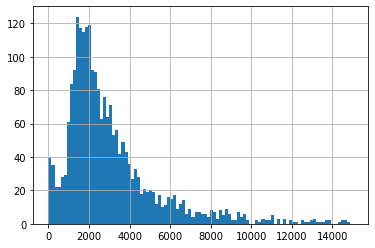

In [22]:
full_df['lead_and_text'].str.len().hist(bins=100, alpha=1, range=(0,15000))
print('Długość artykułów na wszystkich portalach - histogram')

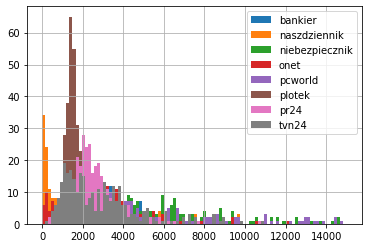

In [23]:
for portal in portals:
    ax = full_df['lead_and_text'].where(full_df.portal==portal).dropna().str.len().hist(bins=100, alpha=1, range=(0,15000), stacked=False, legend=True, orientation='vertical')
    ax.legend(portals)

histogram popularności słów


count     2400.000000
mean       646.964583
std       1394.993872
min          9.000000
25%        226.750000
50%        348.000000
75%        567.000000
max      26725.000000
Name: lead_and_text, dtype: float64

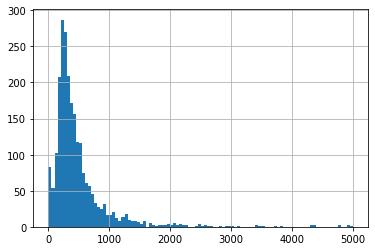

In [24]:
print('histogram popularności słów')
word_count = full_df['lead_and_text'].str.split().map(lambda x: len(x))
word_count.hist(bins=100, alpha=1, range=(0,5000))
word_count.describe()

In [25]:
corpus = []
for x in full_df['lead_and_text'].str.split():
    corpus.extend([each_string.lower() for each_string in x])

In [26]:
corpus

['środowa',
 'sesja',
 'na',
 'wall',
 'street',
 'zakończyła',
 'się',
 'spadkami',
 'pomimo',
 'wzrostów',
 'w',
 'ciągu',
 'dnia.',
 'rynki',
 'śledzą',
 'napływające',
 'raporty',
 'finansowe',
 'spółek',
 'za',
 'czwarty',
 'kwartał,',
 'ale',
 'nadal',
 'główne',
 'obawy',
 'związane',
 'są',
 'z',
 'perspektywą',
 'zbliżających',
 'się',
 'podwyżek',
 'stóp',
 'procentowych',
 'w',
 'usa.',
 'dow',
 'jones',
 'industrial',
 'na',
 'zamknięciu',
 'spadł',
 'o',
 '339',
 'punktów,',
 'czyli',
 '0,96',
 'proc.,',
 'do',
 '35.028,65',
 'pkt.',
 's&p',
 '500',
 'na',
 'koniec',
 'dnia',
 'stracił',
 '0,97',
 'proc.',
 'i',
 'wyniósł',
 '4.532,76',
 'pkt.',
 'nasdaq',
 'composite',
 'zniżkował',
 '1,15',
 'proc.',
 'i',
 'zamknął',
 'sesję',
 'na',
 'poziomie',
 '14.340,25',
 'pkt.',
 'indeks',
 'spadł',
 'już',
 '10',
 'proc.',
 'z',
 'historycznego',
 'szczytu',
 'notowań',
 'z',
 'listopada',
 'zeszłego',
 'roku.',
 '"jesteśmy',
 'w',
 'późnej',
 'fazie',
 'cyklu,',
 'w',
 'którym'

In [47]:
counter=Counter(corpus)
most=counter.most_common()
pprint(most[0:10])

[('–', 52443),
 ('w', 41469),
 ('na', 26058),
 ('z', 25467),
 ('przyrost', 24071),
 ('i', 22434),
 ('do', 18291),
 ('się', 16632),
 ('że', 14087),
 ('nie', 12469)]


In [28]:
len(counter.keys())

149992

In [29]:
first_n = 40
x, y= [], []
for word,count in most[:first_n]:
        x.append(word)
        y.append(count)

40 najczęściej występujących słów w korpusie


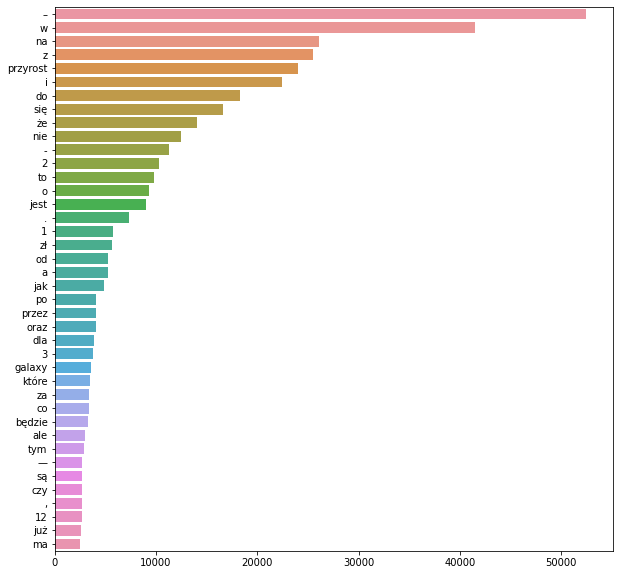

In [30]:
plt.figure(figsize=(10, 10))
sns.barplot(x=y,y=x)
print(f"{first_n} najczęściej występujących słów w korpusie")

In [31]:
print('lista języków z dostępnymi stopwordami w nltk:')
print(stopwords.fileids())
# brakuje polskich stopwords w nltk więc musimy kombinować
# nltk.download('stopwords')
# stop=set(stopwords.words('polish'))
# polskie stopwords możemy znaleźć np. na https://github.com/bieli/stopwords/blob/master/polish.stopwords.txt

lista języków z dostępnymi stopwordami w nltk:
['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [32]:
stop = set(PolishLocaleHelper.stopwords)

In [33]:
first_n = 40
x, y= [], []
for word,count in most[:first_n]:
    if word not in stop:
        x.append(word)
        y.append(count)
        print(word)

przyrost
galaxy


40 najczęściej występujących słów w korpusie po usunięciu stopwords


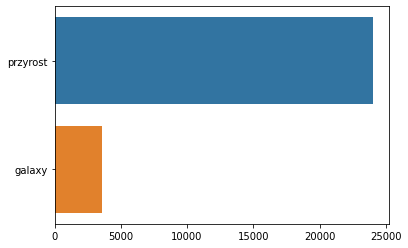

In [34]:
sns.barplot(x=y,y=x)
print(f"{first_n} najczęściej występujących słów w korpusie po usunięciu stopwords")

In [43]:
print(f"Liczba stopwordów dla języka polskiego: {len(stop)}")
print(f"Stopword'y z NLTK mają typ {type(stop)} \n")
pprint(sorted(stop))

Liczba stopwordów dla języka polskiego: 364
Stopword'y z NLTK mają typ <class 'set'> 

[',',
 '-',
 '.',
 '1',
 '11',
 '12',
 '13',
 '2',
 '2021',
 '3',
 '4',
 'a',
 'aby',
 'ach',
 'acz',
 'aczkolwiek',
 'aj',
 'albo',
 'ale',
 'alez',
 'ależ',
 'ani',
 'az',
 'aż',
 'bardziej',
 'bardzo',
 'beda',
 'bede',
 'bedzie',
 'bez',
 'bo',
 'bowiem',
 'by',
 'byc',
 'byl',
 'byla',
 'byli',
 'bylo',
 'byly',
 'bynajmniej',
 'być',
 'był',
 'była',
 'było',
 'były',
 'będzie',
 'będą',
 'będę',
 'cala',
 'cali',
 'caly',
 'cała',
 'cały',
 'ci',
 'cie',
 'ciebie',
 'cię',
 'co',
 'cokolwiek',
 'cos',
 'coś',
 'czasami',
 'czasem',
 'czemu',
 'czy',
 'czyli',
 'daleko',
 'deda',
 'dla',
 'dlaczego',
 'dlatego',
 'do',
 'dobrze',
 'dokad',
 'dokąd',
 'dosc',
 'dość',
 'duzo',
 'dużo',
 'dwa',
 'dwaj',
 'dwie',
 'dwoje',
 'dzis',
 'dzisiaj',
 'dziś',
 'gdy',
 'gdyby',
 'gdyz',
 'gdyż',
 'gdzie',
 'gdziekolwiek',
 'gdzies',
 'gdzieś',
 'go',
 'i',
 'ich',
 'ile',
 'im',
 'inna',
 'inne',
 'inny',

In [36]:
most_nostop = []
for word, count in most:
    if word.lower() not in stop:
        most_nostop.append((word, count))

20 najczęściej występujących słów w korpusie bez stopwords


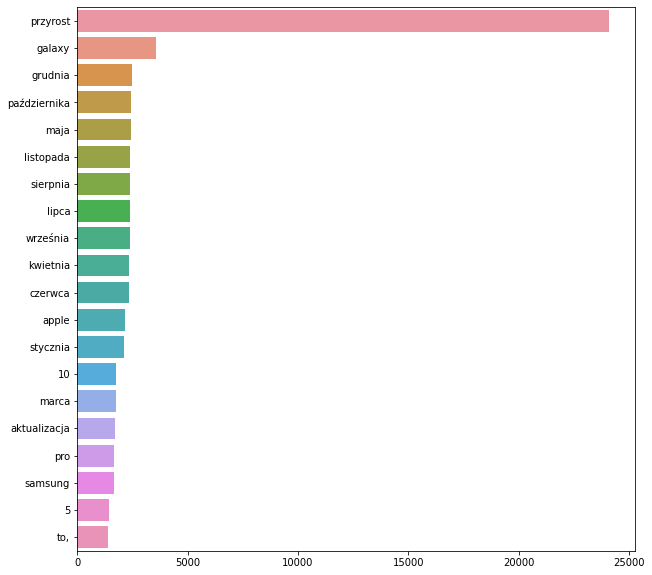

In [48]:
# aby uzyskać 40 najczęściej występujących słów najpierw odfiltrujmy stopwordy
# niestety pozostały szumy (np. /><br czy />The)
first_n = 20
x, y= [], []
for word,count in most_nostop[:first_n]:
        x.append(word)
        y.append(count)

plt.figure(figsize=(10, 10))
sns.barplot(x=y,y=x)
print(f"{first_n} najczęściej występujących słów w korpusie bez stopwords")

In [2]:
# wordcloud = WordCloud(width = 800, height = 800,
#                 background_color ='white',
#                 stopwords = stopwords,
#                 min_font_size = 10).generate(most_nostop)
#
# # plot the WordCloud image
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)
#
# plt.show()

NameError: name 'WordCloud' is not defined